### 신경망 모델
- 이진 분류: 유방암 예측 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.shape

(569, 31)

### 1. 데이터를 정규/표준화 하지 않은 경우

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

- 모델 정의

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Fully Connected Network

In [13]:
# 첫 번째 레이어는 입력 형태에 대한 정보를 받습니다. 
# 두 번째 이후 레이어들은 자동으로 형태를 추정할 수 있기 때문에 형태 정보를 갖고 있을 필요는 없습니다.

model = Sequential([
    Dense(100, input_shape=(30,), activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- 모델학습

In [15]:
history = model.fit(X_train, y_train, validation_split=0.2, 
                    epochs=100, batch_size=100, verbose=0)

- 모델 평가

In [16]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2830 - accuracy: 0.9386


[0.28297391533851624, 0.9385964870452881]

- 훈련과정 시각화: epoch에 따른 accuracy, val_loss의 변화

In [17]:
y_acc = history.history['accuracy']
y_loss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

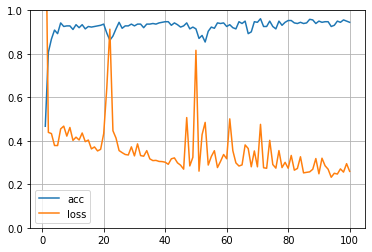

In [18]:
plt.plot(xs, y_acc, label='acc')
plt.plot(xs, y_loss, label='loss')
plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

### 2. 데이터를 정규/표준화한 경우

In [19]:
from sklearn.preprocessing import StandardScaler

cancer_std = StandardScaler().fit_transform(cancer.data)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

- 모델 정의

In [21]:
model = Sequential()
model.add(Dense(100, input_dim=30, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               3100      
                                                                 
 dense_7 (Dense)             (None, 24)                2424      
                                                                 
 dense_8 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

- 모델 학습

In [23]:
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=100, batch_size=100, verbose=0)

- 모델 평가

In [24]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.9649


[0.09997999668121338, 0.9649122953414917]

In [25]:
y_acc = hist.history['accuracy']
y_loss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

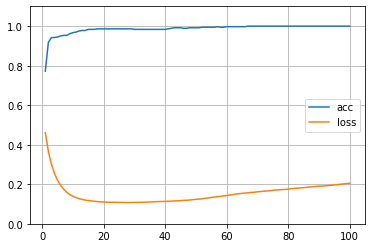

In [26]:
plt.plot(xs, y_acc, label='acc')
plt.plot(xs, y_loss, label='loss')
plt.ylim([0,1.1])
plt.grid()
plt.legend()
plt.show()